## Modelli di apprendimento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
dataset = pd.read_csv("data/data.csv")
dataset

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
def conf_matrix(y_true, predictions):
    conf_matrix = confusion_matrix(y_true, predictions)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predetto Negativo', 'Predetto Positivo'],
            yticklabels=['Reale Negativo', 'Reale Positivo'])
    plt.xlabel("Predizione")
    plt.ylabel("Valore Reale")
    plt.title("Matrice di Confusione")
    plt.show()

    tn, fp, fn, tp = conf_matrix.ravel()

    return tn, fp, fn, tp

In [4]:
results = []

### Logistic regression

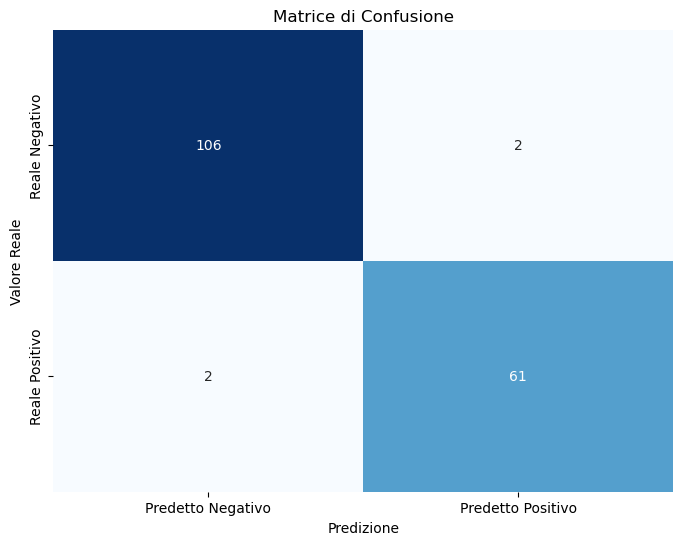

Accuracy =  0.9766081871345029
Precision =  0.9682539682539683
Recall =  0.9682539682539683
F1 =  0.9682539682539683
Specifity =  0.9814814814814815


In [5]:
X = dataset.drop(['Diagnosis'], axis=1)
y = dataset['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)

model = LogisticRegression(random_state=42, max_iter=5000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

tn, fp, fn, tp = conf_matrix(y_test, predictions)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
spec = tn / (tn + fp)

print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)
spec = tn / (tn + fp)
print("Specifity = ", spec)

results.append({
    'Modello': 'logistic',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Specifity': spec
})

### Decision tree

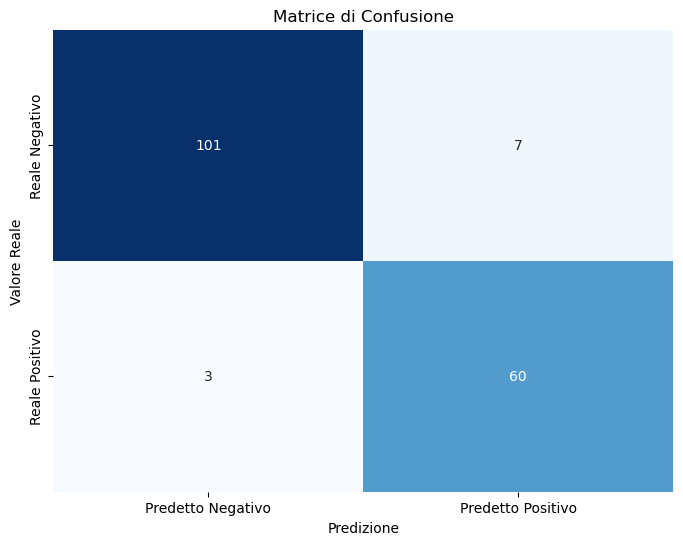

Accuracy =  0.9415204678362573
Precision =  0.8955223880597015
Recall =  0.9523809523809523
F1 =  0.9230769230769231
Specifity =  0.9351851851851852


In [6]:
model = DecisionTreeClassifier(random_state=42, max_depth=10, criterion='gini')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

tn, fp, fn, tp = conf_matrix(y_test, predictions)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
spec = tn / (tn + fp)

print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)
spec = tn / (tn + fp)
print("Specifity = ", spec)

results.append({
    'Modello': 'decision_tree',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Specifity': spec
})

### Random forest

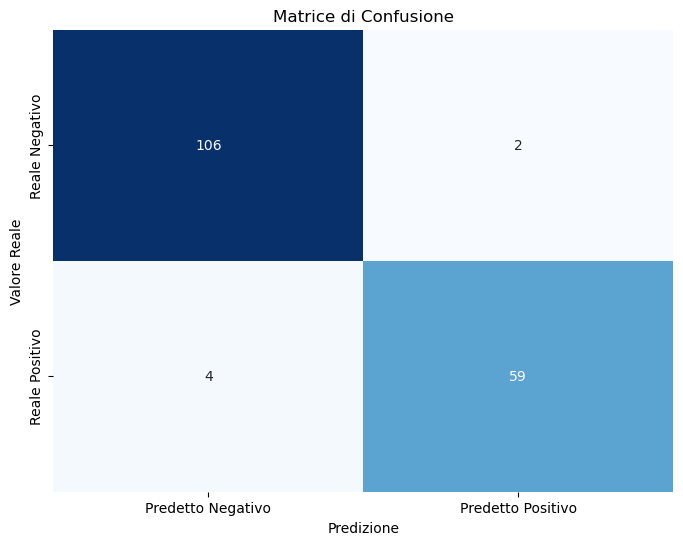

Accuracy =  0.9649122807017544
Precision =  0.9672131147540983
Recall =  0.9365079365079365
F1 =  0.9516129032258065
Specifity =  0.9814814814814815


In [7]:
model = RandomForestClassifier(n_estimators=5, max_depth=10, criterion='gini')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

tn, fp, fn, tp = conf_matrix(y_test, predictions)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
spec = tn / (tn + fp)

print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)
spec = tn / (tn + fp)
print("Specifity = ", spec)

results.append({
    'Modello': 'random_forest',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Specifity': spec
})

### Support Vector Machine (SVM)

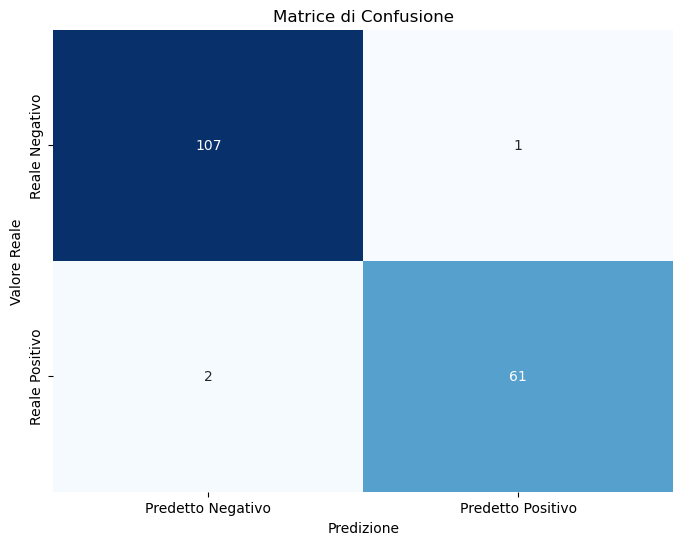

Accuracy =  0.9824561403508771
Precision =  0.9838709677419355
Recall =  0.9682539682539683
F1 =  0.976
Specifity =  0.9907407407407407


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

predictions = svm_model.predict(X_test_scaled)

tn, fp, fn, tp = conf_matrix(y_test, predictions)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
spec = tn / (tn + fp)

print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)
spec = tn / (tn + fp)
print("Specifity = ", spec)

results.append({
    'Modello': 'svm',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Specifity': spec
})

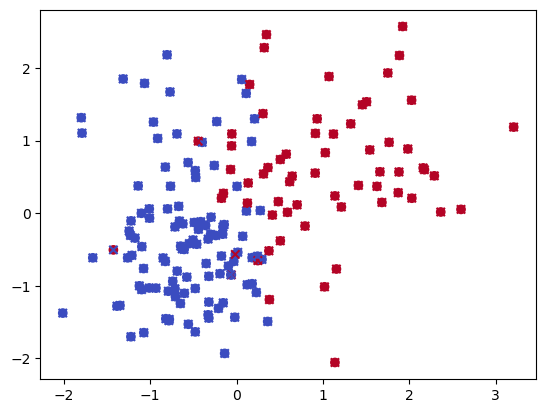

In [9]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=predictions, cmap='coolwarm')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, marker='x', cmap='coolwarm')
plt.show()

In [11]:
metrics = pd.DataFrame(results)
metrics

,Modello,Accuracy,Precision,Recall,F1-Score,Specifity
0,logistic,0.976608,0.968254,0.968254,0.968254,0.981481
1,decision_tree,0.941520,0.895522,0.952381,0.923077,0.935185
2,random_forest,0.964912,0.967213,0.936508,0.951613,0.981481
3,svm,0.982456,0.983871,0.968254,0.976000,0.990741


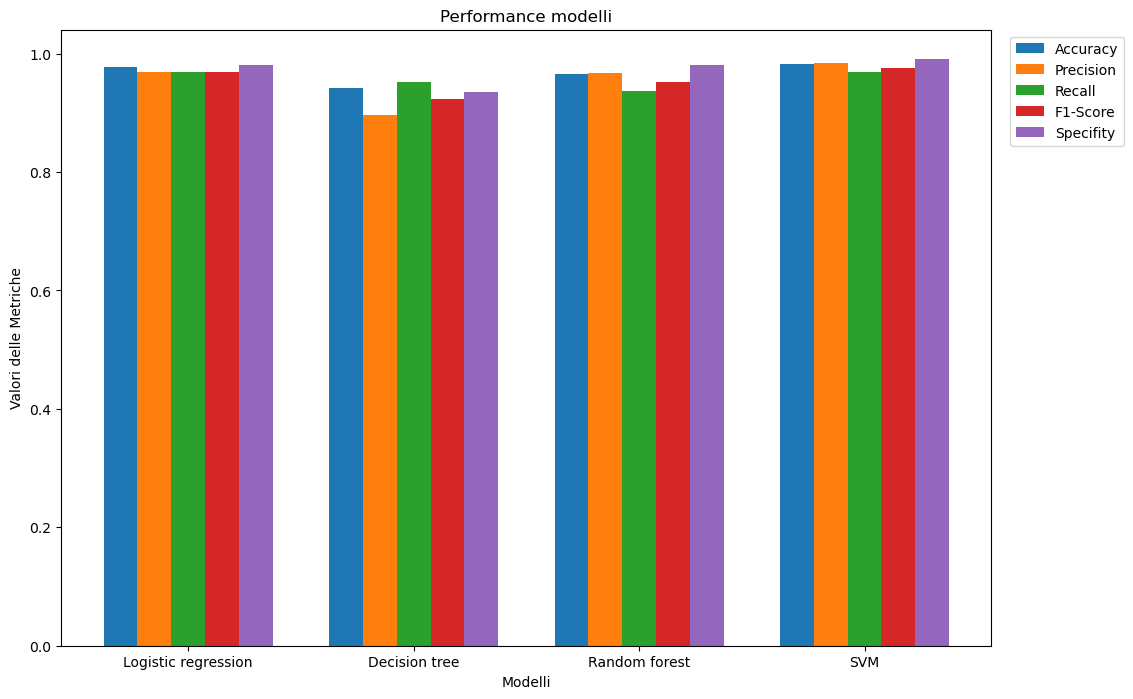

In [30]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specifity']
models = ['Logistic regression', 'Decision tree', 'Random forest', 'SVM']

x = np.arange(len(metrics['Modello']))  # Coordinate x per ogni modello
width = 0.15  # larghezza delle barre

fig, ax = plt.subplots(figsize=(12, 8))

# Ciclo per tracciare le barre per ogni metrica
for i, metrica in enumerate(labels):
    ax.bar(x + i * width, metrics[metrica], width, label=metrica)

# Personalizzazione delle etichette e legenda
ax.set_xlabel('Modelli')
ax.set_ylabel('Valori delle Metriche')
ax.set_title('Performance modelli')
ax.set_xticks(x + width * (len(labels) - 1) / 2)
ax.set_xticklabels(models)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

###